<a href="https://colab.research.google.com/github/saranyamurugesan500/AI-Echo-Your-Smartest-Conversational-Partner/blob/main/sentimental.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [ ]:
import pandas as pd
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, confusion_matrix, precision_score, recall_score, f1_score, classification_report,r2_score,mean_squared_error
from sklearn.preprocessing import LabelEncoder, OrdinalEncoder, StandardScaler,OneHotEncoder
from sklearn.pipeline import Pipeline
from sklearn.compose import ColumnTransformer
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.feature_extraction.text import TfidfVectorizer
import numpy as np
from scipy import stats
import seaborn as sns
import joblib
import pickle
import matplotlib.pyplot as plt
%matplotlib inline
from sklearn.naive_bayes import MultinomialNB
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier, GradientBoostingClassifier

In [ ]:
df=pd.read_csv("/content/drive/MyDrive/chatgpt_style_reviews_dataset.xlsx - Sheet1 (1).csv")

In [ ]:
df

,date,title,review,rating,username,helpful_votes,review_length,platform,language,location,version,verified_purchase
0,2024-09-06,Claim who accept.,Every quite sense including six lot have never...,4,morrowthomas,30,22,Flipkart,ar,Nepal,3.8.4,No
1,3/7/2025,Growth pretty wish.,Ask develop bag also his worker pass. Expert w...,4,sheakimberly,120,22,Flipkart,ar,Guinea,5.2.6,Yes
2,########,What then spend offer reason whom none.,If customer address region try near risk next ...,5,katherineali,130,21,Flipkart,es,Kuwait,3.6.5,No
3,########,Say dog drug enter director strong student.,To television loss election him small detail r...,1,eric11,72,26,Amazon,pt,Uruguay,5.7.2,No
4,########,Purpose here beyond.,Pass share must amount lot per manage world to...,5,chloe42,123,27,Amazon,zh,Mayotte,5.8.6,No
...,...,...,...,...,...,...,...,...,...,...,...,...
245,########,Father who tax.,Government card history suddenly save theory s...,5,amassey,109,22,App Store,en,Micronesia,2.3.4,Yes
246,########,Remain movement bit step direction give reduce.,Court control million hundred offer total hit ...,5,stevenandrews,26,23,Website,fr,Austria,3.5.3,No
247,########,Form now then watch certain.,Just opportunity ask yet against large practic...,1,michelle90,67,24,App Store,ru,Rwanda,3.9.6,No
248,3/7/2024,Recent catch gas benefit great religious.,Onto simple audience as including claim create...,5,victor24,29,19,Amazon,zh,Iran,4.9.2,No


Handle Missing / Invalid Data

In [ ]:

df = df.dropna(subset=['review'])
df = df[df['review'].str.strip() != '']  # Remove empty review

Remove Duplicates


In [ ]:
df = df.drop_duplicates(subset='review')

lower case

Removal of *Tags*

In [ ]:
import re

def clean_text(text):
    text = re.sub(r'http\S+', '', text)               # remove URLs
    text = re.sub(r'@\w+', '', text)                  # remove mentions
    text = re.sub(r'#\w+', '', text)                  # remove hashtags
    text = re.sub(r'[^a-zA-Z\s]', '', text)           # remove non-alphabetic chars
    return text
    df['clean_review'] = df['review'].apply(clean_text)

In [ ]:
df['clean_review'] = df['review'].apply(lambda x: " ".join(str(x).split()))  # Remove extra spaces

In [ ]:
df['clean_review']

,clean_review
0,Every quite sense including six lot have never...
1,Ask develop bag also his worker pass. Expert w...
2,If customer address region try near risk next ...
3,To television loss election him small detail r...
4,Pass share must amount lot per manage world to...
...,...
245,Government card history suddenly save theory s...
246,Court control million hundred offer total hit ...
247,Just opportunity ask yet against large practic...
248,Onto simple audience as including claim create...


In [ ]:
df['clean_review'] = df['clean_review'].apply(clean_text)

In [ ]:

df['clean_review']

,clean_review
0,Every quite sense including six lot have never...
1,Ask develop bag also his worker pass Expert wh...
2,If customer address region try near risk next ...
3,To television loss election him small detail r...
4,Pass share must amount lot per manage world to...
...,...
245,Government card history suddenly save theory s...
246,Court control million hundred offer total hit ...
247,Just opportunity ask yet against large practic...
248,Onto simple audience as including claim create...


Text Normalization - Tokenization

In [ ]:

import nltk
nltk.download('punkt')
nltk.download('punkt_tab')  # newer versions of NLTK require this
nltk.download('stopwords')
nltk.download('wordnet')

[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Unzipping tokenizers/punkt.zip.
[nltk_data] Downloading package punkt_tab to /root/nltk_data...
[nltk_data]   Unzipping tokenizers/punkt_tab.zip.
[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Unzipping corpora/stopwords.zip.
[nltk_data] Downloading package wordnet to /root/nltk_data...


True

In [ ]:
from nltk.tokenize import word_tokenize
df['tokens'] = df['clean_review'].apply(word_tokenize)
df['tokens']

,tokens
0,"[Every, quite, sense, including, six, lot, hav..."
1,"[Ask, develop, bag, also, his, worker, pass, E..."
2,"[If, customer, address, region, try, near, ris..."
3,"[To, television, loss, election, him, small, d..."
4,"[Pass, share, must, amount, lot, per, manage, ..."
...,...
245,"[Government, card, history, suddenly, save, th..."
246,"[Court, control, million, hundred, offer, tota..."
247,"[Just, opportunity, ask, yet, against, large, ..."
248,"[Onto, simple, audience, as, including, claim,..."


In [ ]:
!pip install pyspellchecker

from spellchecker import SpellChecker

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 7.2/7.2 MB 65.3 MB/s eta 0:00:00


In [ ]:
spell = SpellChecker()

def spell_checker(tokens):
    corrected_tokens = [spell.correction(token) for token in tokens]
    return corrected_tokens

# Assuming df['tokens'][0] is a list of tokens
result = spell_checker(df['tokens'][0])
print(result)

['Every', 'quite', 'sense', 'including', 'six', 'lot', 'have', 'never', 'effect', 'fill', 'general', 'relationship', 'save', 'Security', 'land', 'record', 'class', 'Democrat', 'hundred', 'full', 'nearly', 'recent']


In [ ]:
# Quick check
print("Rows after cleaning:", len(df))
print(df[['tokens']].head(5).to_string(index=False))

Rows after cleaning: 250
                                                                                                                                                                                          tokens
                      [Every, quite, sense, including, six, lot, have, never, effect, fill, general, relationship, save, Security, land, record, class, Democrat, hundred, full, nearly, recent]
                                     [Ask, develop, bag, also, his, worker, pass, Expert, white, arm, similar, compare, manager, action, sure, us, million, crime, six, member, recognize, past]
                                             [If, customer, address, region, try, near, risk, next, on, girl, spring, Paper, create, upon, offer, end, imagine, blood, authority, family, water]
[To, television, loss, election, him, small, detail, red, son, include, good, Act, strategy, eat, behavior, purpose, start, away, use, live, government, thus, especially, water, raise, travel]
   [Pass, 

remove stopwords

In [ ]:
from nltk.corpus import stopwords
print(stopwords.words('english'))

['a', 'about', 'above', 'after', 'again', 'against', 'ain', 'all', 'am', 'an', 'and', 'any', 'are', 'aren', "aren't", 'as', 'at', 'be', 'because', 'been', 'before', 'being', 'below', 'between', 'both', 'but', 'by', 'can', 'couldn', "couldn't", 'd', 'did', 'didn', "didn't", 'do', 'does', 'doesn', "doesn't", 'doing', 'don', "don't", 'down', 'during', 'each', 'few', 'for', 'from', 'further', 'had', 'hadn', "hadn't", 'has', 'hasn', "hasn't", 'have', 'haven', "haven't", 'having', 'he', "he'd", "he'll", 'her', 'here', 'hers', 'herself', "he's", 'him', 'himself', 'his', 'how', 'i', "i'd", 'if', "i'll", "i'm", 'in', 'into', 'is', 'isn', "isn't", 'it', "it'd", "it'll", "it's", 'its', 'itself', "i've", 'just', 'll', 'm', 'ma', 'me', 'mightn', "mightn't", 'more', 'most', 'mustn', "mustn't", 'my', 'myself', 'needn', "needn't", 'no', 'nor', 'not', 'now', 'o', 'of', 'off', 'on', 'once', 'only', 'or', 'other', 'our', 'ours', 'ourselves', 'out', 'over', 'own', 're', 's', 'same', 'shan', "shan't", 'she

In [ ]:
en_stopwords = stopwords.words('english')

def remove_stopwords(tokens):
  result = []
  for token in tokens:
    # token= token.lower()
    if token not in en_stopwords:
      result.append(token)
  # return " ".join(result)
  return result


In [ ]:
result = remove_stopwords(df['tokens'][0])
print(result)

['Every', 'quite', 'sense', 'including', 'six', 'lot', 'never', 'effect', 'fill', 'general', 'relationship', 'save', 'Security', 'land', 'record', 'class', 'Democrat', 'hundred', 'full', 'nearly', 'recent']


In [ ]:
from nltk import FreqDist

def frequent_words(tokens):
    # Flatten the list of token lists to a single list of tokens
    all_tokens = [token for review in tokens for token in review]
    fdist = FreqDist(all_tokens)
    return fdist.most_common(20)

top_20_words = frequent_words(df['tokens'])
print(top_20_words)


[('across', 13), ('red', 11), ('fact', 11), ('mind', 11), ('beat', 11), ('everyone', 11), ('relationship', 10), ('develop', 10), ('interest', 10), ('concern', 10), ('produce', 10), ('machine', 10), ('buy', 10), ('process', 10), ('law', 10), ('million', 9), ('loss', 9), ('live', 9), ('recently', 9), ('when', 9)]


stemming

In [ ]:
import nltk
nltk.download('omw-1.4')

[nltk_data] Downloading package omw-1.4 to /root/nltk_data...


True

In [ ]:
from nltk.stem import PorterStemmer

In [ ]:
def stemming(tokens):
  porter = PorterStemmer()
  result=[]
  for word in tokens:
    result.append(porter.stem(word))
  return result

In [ ]:

result = stemming(df['tokens'][0])
print(result)

['everi', 'quit', 'sens', 'includ', 'six', 'lot', 'have', 'never', 'effect', 'fill', 'gener', 'relationship', 'save', 'secur', 'land', 'record', 'class', 'democrat', 'hundr', 'full', 'nearli', 'recent']


Label   

In [ ]:
def rating_to_sentiment(r):
    if r >= 4:
        return 'positive'
    elif r == 3:
        return 'neutral'
    else:
        return 'negative'

df['sentiment'] = df['rating'].apply(rating_to_sentiment)

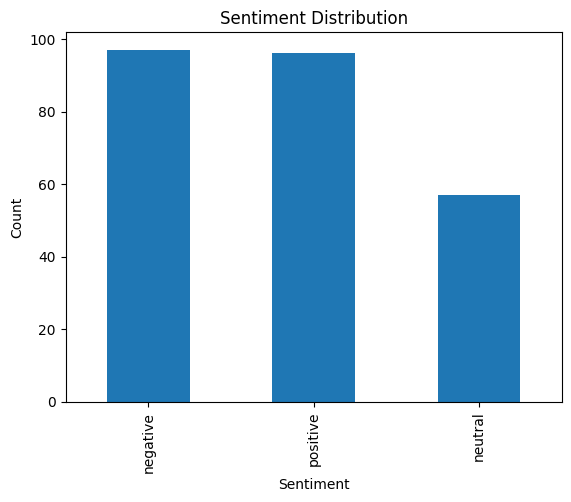

In [ ]:
sentiment_counts = df['sentiment'].value_counts()
sentiment_counts.plot(kind='bar', title='Sentiment Distribution')
plt.xlabel('Sentiment')
plt.ylabel('Count')
plt.show()

Text Vectorization

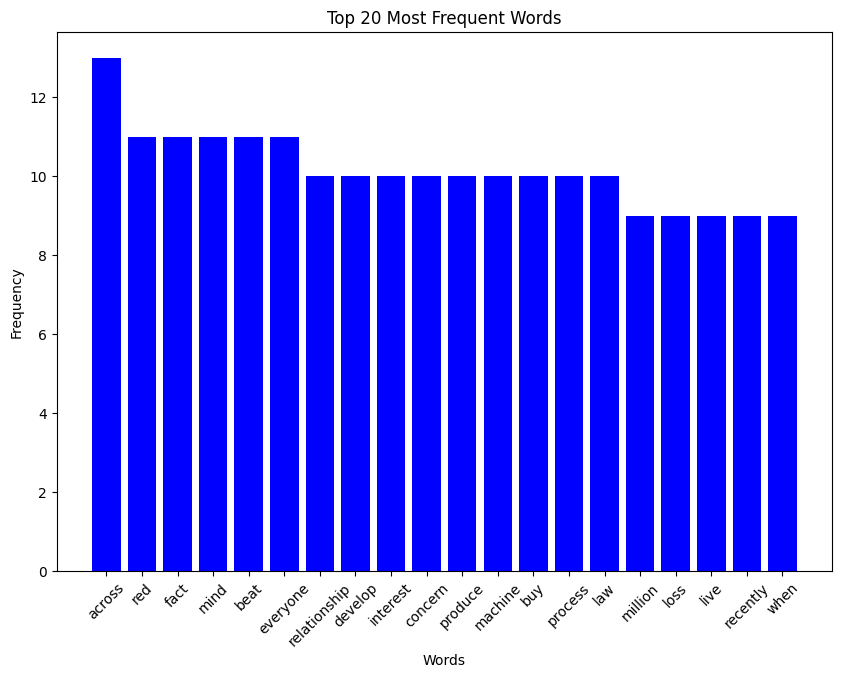

In [ ]:
import matplotlib.pyplot as plt
from wordcloud import WordCloud
from nltk import FreqDist

# Flatten list of token lists to single list of tokens
all_tokens = [token for review in df['tokens'] for token in review]

# Generate frequency distribution
fdist = FreqDist(all_tokens)


# Histogram of top 20 words
top_words = fdist.most_common(20)
words = [w[0] for w in top_words]
counts = [w[1] for w in top_words]

plt.figure(figsize=(10,7))
plt.bar(words, counts, color='blue')
plt.xticks(rotation=45)
plt.title('Top 20 Most Frequent Words')
plt.xlabel('Words')
plt.ylabel('Frequency')
plt.show()


Text into Numerical Features

In [ ]:
from sklearn.feature_extraction.text import TfidfVectorizer

# Join tokens into sentences
corpus = df['tokens'].apply(lambda x: " ".join(x))

vectorizer = TfidfVectorizer()
X = vectorizer.fit_transform(corpus)

print("TF-IDF shape:", X.shape)
print(X.toarray())

TF-IDF shape: (250, 967)
[[0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]
 ...
 [0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]]


In [ ]:
df_bow_sklearn = pd.DataFrame(X.toarray(),columns=vectorizer.get_feature_names_out())
df_bow_sklearn.head()

,ability,able,about,above,accept,according,account,across,act,action,...,wrong,yard,yeah,year,yes,yet,you,young,your,yourself
0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.000000,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.210466,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.000000,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.199474,0.000000,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.000000,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


EDA Report with Visualizations

##📊 1. What is the distribution of review ratings?
Visualization: Bar chart (1 to 5 stars)
 Insight: Understand overall sentiment  are users mostly happy or frustrated?##

/tmp/ipython-input-306006590.py:6: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(x='rating', data=df, palette='coolwarm', order=sorted(df['rating'].unique()))


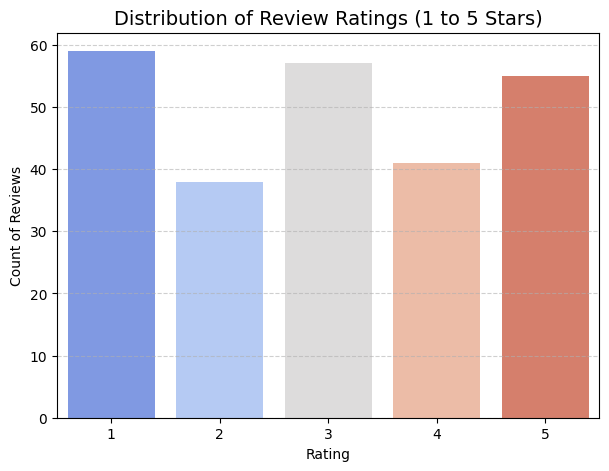

rating
1    59
2    38
3    57
4    41
5    55
Name: count, dtype: int64


In [ ]:
# Check if the 'rating' column exists
assert 'rating' in df.columns, "Make sure df['rating'] column exists."

# Plot the distribution
plt.figure(figsize=(7,5))
sns.countplot(x='rating', data=df, palette='coolwarm', order=sorted(df['rating'].unique()))
plt.title('Distribution of Review Ratings (1 to 5 Stars)', fontsize=14)
plt.xlabel('Rating')
plt.ylabel('Count of Reviews')
plt.grid(axis='y', linestyle='--', alpha=0.6)
plt.show()

# Print counts
print(df['rating'].value_counts().sort_index())

#👍👎 2. How many reviews were marked as helpful (above a certain threshold)?
Visualization: Thumbs up/down count or pie chart
 Insight: See how much value users find in reviews, e.g., reviews with more than 10 helpful votes.#

/tmp/ipython-input-1755122775.py:24: UserWarning: Glyph 128078 (\N{THUMBS DOWN SIGN}) missing from font(s) DejaVu Sans.
  plt.tight_layout()
/tmp/ipython-input-1755122775.py:24: UserWarning: Glyph 128077 (\N{THUMBS UP SIGN}) missing from font(s) DejaVu Sans.
  plt.tight_layout()
/usr/local/lib/python3.12/dist-packages/IPython/core/pylabtools.py:151: UserWarning: Glyph 128078 (\N{THUMBS DOWN SIGN}) missing from font(s) DejaVu Sans.
  fig.canvas.print_figure(bytes_io, **kw)
/usr/local/lib/python3.12/dist-packages/IPython/core/pylabtools.py:151: UserWarning: Glyph 128077 (\N{THUMBS UP SIGN}) missing from font(s) DejaVu Sans.
  fig.canvas.print_figure(bytes_io, **kw)


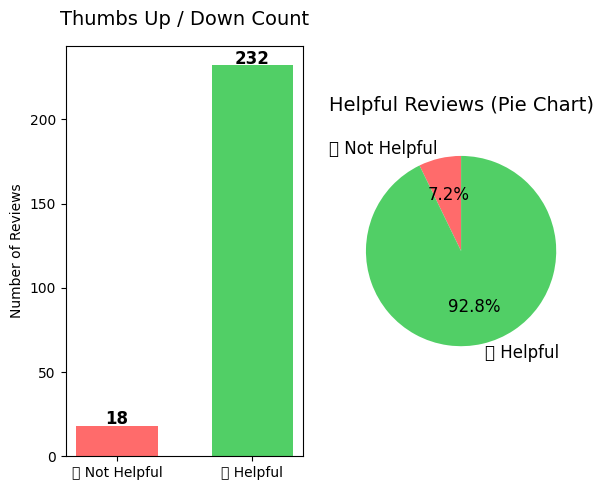

In [ ]:
threshold = 10
df['is_helpful'] = df['helpful_votes'].apply(lambda x: 1 if x > threshold else 0)

# Count helpful vs not helpful
helpful_counts = df['is_helpful'].value_counts().sort_index()
labels = ['👎 Not Helpful', '👍 Helpful']
values = helpful_counts.values
colors = ['#ff6b6b', '#51cf66']

# Create figure
fig, axes = plt.subplots(1, 2, figsize=(6, 5))

# --- Bar chart ---
axes[0].bar(labels, values, color=colors, width=0.6)
axes[0].set_title("Thumbs Up / Down Count", fontsize=14, pad=15)
axes[0].set_ylabel("Number of Reviews")
for i, v in enumerate(values):
    axes[0].text(i, v + 1, str(v), ha='center', fontsize=12, fontweight='bold')

# --- Pie chart ---
axes[1].pie(values, labels=labels, autopct='%1.1f%%', startangle=90, colors=colors, textprops={'fontsize': 12})
axes[1].set_title("Helpful Reviews (Pie Chart)", fontsize=14, pad=15)

plt.tight_layout()
plt.show()

#🧭 3. What are the most common keywords in positive vs. negative reviews?
Visualization: Two Word Clouds (one for 4–5 stars, one for 1–2 stars)
 Insight: Discover what users love or complain about.
#

/usr/local/lib/python3.12/dist-packages/IPython/core/pylabtools.py:151: UserWarning: Glyph 127775 (\N{GLOWING STAR}) missing from font(s) DejaVu Sans.
  fig.canvas.print_figure(bytes_io, **kw)
/usr/local/lib/python3.12/dist-packages/IPython/core/pylabtools.py:151: UserWarning: Glyph 128162 (\N{ANGER SYMBOL}) missing from font(s) DejaVu Sans.
  fig.canvas.print_figure(bytes_io, **kw)


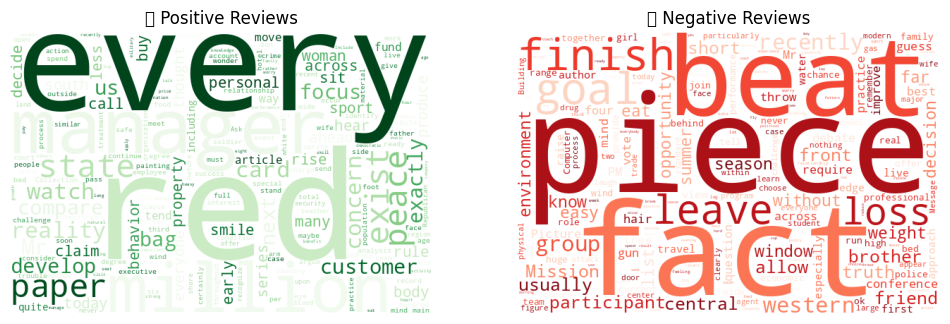

In [ ]:
from wordcloud import WordCloud
import matplotlib.pyplot as plt

# Split reviews
positive = " ".join(df[df['rating'] >= 4]['clean_review'])
negative = " ".join(df[df['rating'] <= 2]['clean_review'])

# Create word clouds
pos_wc = WordCloud(width=600, height=400, background_color='white', colormap='Greens').generate(positive)
neg_wc = WordCloud(width=600, height=400, background_color='white', colormap='Reds').generate(negative)

# Show side by side
plt.figure(figsize=(12, 5))
plt.subplot(1, 2, 1)
plt.imshow(pos_wc)
plt.title("🌟 Positive Reviews")
plt.axis("off")

plt.subplot(1, 2, 2)
plt.imshow(neg_wc)
plt.title("💢 Negative Reviews")
plt.axis("off")

plt.show()


#📆 4. How has the average rating changed over time?
Visualization: Line chart with date on x-axis, average rating on y-axis
 Insight: Track user satisfaction over weeks/months.#

Detected date columns: ['date', 'sentiment']


/tmp/ipython-input-3143525016.py:13: FutureWarning: 'M' is deprecated and will be removed in a future version, please use 'ME' instead.
  trend = df.groupby(pd.Grouper(key=date_col, freq='M'))['rating'].mean().reset_index()
/usr/local/lib/python3.12/dist-packages/IPython/core/pylabtools.py:151: UserWarning: Glyph 128198 (\N{TEAR-OFF CALENDAR}) missing from font(s) DejaVu Sans.
  fig.canvas.print_figure(bytes_io, **kw)


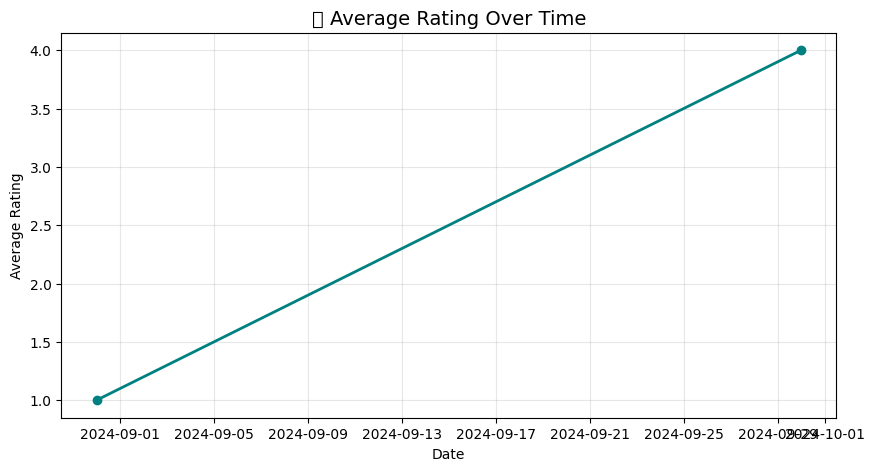

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt

# Try to detect the date column
possible_date_cols = [c for c in df.columns if 'date' in c.lower() or 'time' in c.lower()]
print("Detected date columns:", possible_date_cols)

if possible_date_cols:
    date_col = possible_date_cols[0]
    df[date_col] = pd.to_datetime(df[date_col], errors='coerce')

    # Group by month and calculate average rating
    trend = df.groupby(pd.Grouper(key=date_col, freq='M'))['rating'].mean().reset_index()

    # Plot
    plt.figure(figsize=(10, 5))
    plt.plot(trend[date_col], trend['rating'], marker='o', color='teal', linewidth=2)
    plt.title('📆 Average Rating Over Time', fontsize=14)
    plt.xlabel('Date')
    plt.ylabel('Average Rating')
    plt.grid(True, alpha=0.3)
    plt.show()
else:
    print("⚠️ No date column found in the dataset.")


#🌍 5. How do ratings vary by user location?
Visualization: Bar chart or world map
 Insight: Identify regional differences in satisfaction or experience.#

Detected location columns: ['location']


/tmp/ipython-input-591346408.py:13: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=loc_avg.index, y=loc_avg.values, palette="coolwarm")
/tmp/ipython-input-591346408.py:18: UserWarning: Glyph 127757 (\N{EARTH GLOBE EUROPE-AFRICA}) missing from font(s) DejaVu Sans.
  plt.tight_layout()
/usr/local/lib/python3.12/dist-packages/IPython/core/pylabtools.py:151: UserWarning: Glyph 127757 (\N{EARTH GLOBE EUROPE-AFRICA}) missing from font(s) DejaVu Sans.
  fig.canvas.print_figure(bytes_io, **kw)


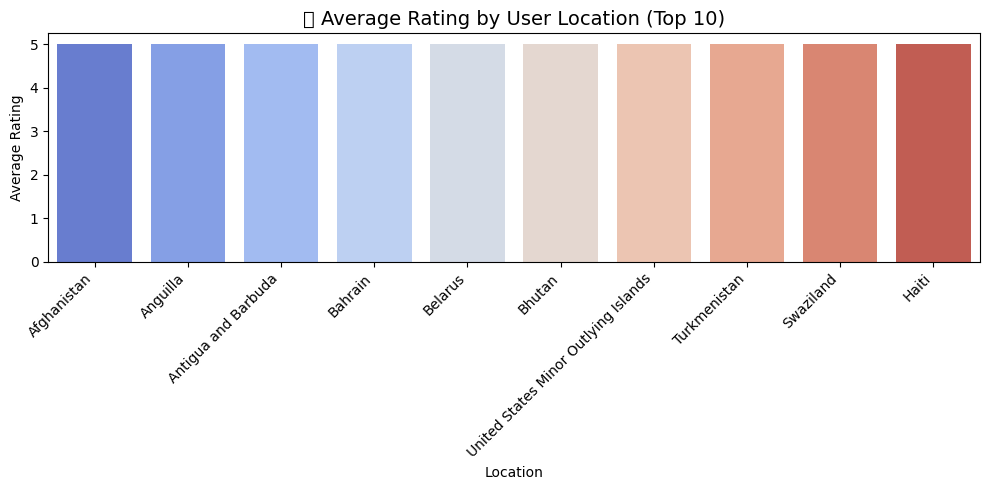

In [ ]:
# Detect possible location columns
possible_location_cols = [c for c in df.columns if 'location' in c.lower() or 'country' in c.lower() or 'region' in c.lower()]
print("Detected location columns:", possible_location_cols)

if possible_location_cols:
    loc_col = possible_location_cols[0]

    # Group by location and calculate average rating
    loc_avg = df.groupby(loc_col)['rating'].mean().sort_values(ascending=False).head(10)

    # Plot
    plt.figure(figsize=(10,5))
    sns.barplot(x=loc_avg.index, y=loc_avg.values, palette="coolwarm")
    plt.title('🌍 Average Rating by User Location (Top 10)', fontsize=14)
    plt.xlabel('Location')
    plt.ylabel('Average Rating')
    plt.xticks(rotation=45, ha='right')
    plt.tight_layout()
    plt.show()
else:
    print("⚠️ No location column found in the dataset.")

#🧑‍💻 6. Which platform (Web vs Mobile) gets better reviews?
Visualization: Grouped bar chart comparing average ratings by platform
 Insight: Helps product teams focus improvements.

Detected platform columns: ['platform']


/tmp/ipython-input-3569728323.py:17: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=platform_avg[platform_col], y=platform_avg['rating'], palette="Set2")
/tmp/ipython-input-3569728323.py:22: UserWarning: Glyph 129489 (\N{ADULT}) missing from font(s) DejaVu Sans.
  plt.tight_layout()
/tmp/ipython-input-3569728323.py:22: UserWarning: Glyph 128187 (\N{PERSONAL COMPUTER}) missing from font(s) DejaVu Sans.
  plt.tight_layout()
/usr/local/lib/python3.12/dist-packages/IPython/core/pylabtools.py:151: UserWarning: Glyph 129489 (\N{ADULT}) missing from font(s) DejaVu Sans.
  fig.canvas.print_figure(bytes_io, **kw)
/usr/local/lib/python3.12/dist-packages/IPython/core/pylabtools.py:151: UserWarning: Glyph 128187 (\N{PERSONAL COMPUTER}) missing from font(s) DejaVu Sans.
  fig.canvas.print_figure(bytes_io, **kw)


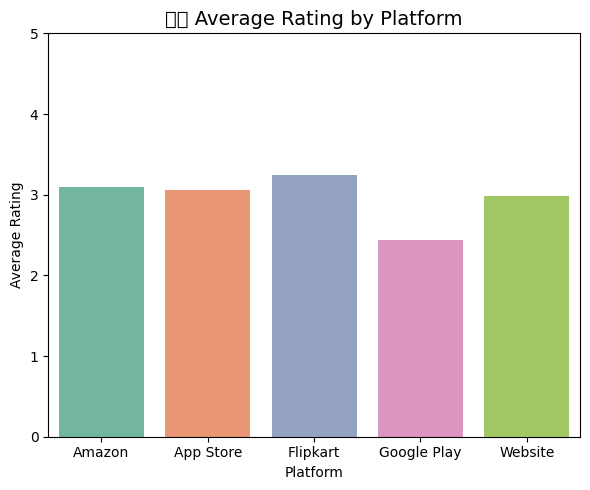

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd

# Detect platform column
possible_platform_cols = [c for c in df.columns if 'platform' in c.lower() or 'device' in c.lower()]
print("Detected platform columns:", possible_platform_cols)

if possible_platform_cols:
    platform_col = possible_platform_cols[0]

    # Calculate average rating per platform
    platform_avg = df.groupby(platform_col)['rating'].mean().reset_index()

    # Plot
    plt.figure(figsize=(6,5))
    sns.barplot(x=platform_avg[platform_col], y=platform_avg['rating'], palette="Set2")
    plt.title('🧑‍💻 Average Rating by Platform', fontsize=14)
    plt.xlabel('Platform')
    plt.ylabel('Average Rating')
    plt.ylim(0, 5)
    plt.tight_layout()
    plt.show()

else:
    print("⚠️ No platform column found in the dataset. Possible names: 'platform', 'device', etc.")


#✅❌ 7. Are verified users more satisfied than non-verified ones?
Visualization: Pie chart or side-by-side bar chart comparing rating averages
 Insight: Indicates whether loyal/paying users are happier.#

/tmp/ipython-input-2158342931.py:15: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x='verified_purchase', y='rating', data=verified_avg, palette='coolwarm')
/tmp/ipython-input-2158342931.py:20: UserWarning: Glyph 9989 (\N{WHITE HEAVY CHECK MARK}) missing from font(s) DejaVu Sans.
  plt.tight_layout()
/tmp/ipython-input-2158342931.py:20: UserWarning: Glyph 10060 (\N{CROSS MARK}) missing from font(s) DejaVu Sans.
  plt.tight_layout()
/usr/local/lib/python3.12/dist-packages/IPython/core/pylabtools.py:151: UserWarning: Glyph 9989 (\N{WHITE HEAVY CHECK MARK}) missing from font(s) DejaVu Sans.
  fig.canvas.print_figure(bytes_io, **kw)
/usr/local/lib/python3.12/dist-packages/IPython/core/pylabtools.py:151: UserWarning: Glyph 10060 (\N{CROSS MARK}) missing from font(s) DejaVu Sans.
  fig.canvas.print_figure(bytes_io, **kw)


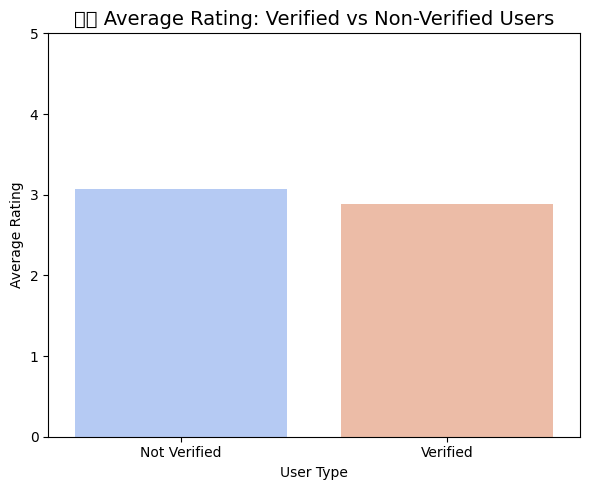

In [ ]:
import numpy as np

# Simulate a 'verified_purchase' column randomly
np.random.seed(42)
df['verified_purchase'] = np.random.choice(['Verified', 'Not Verified'], size=len(df))

# Calculate average rating
verified_avg = df.groupby('verified_purchase')['rating'].mean().reset_index()

# Plot side-by-side bar chart
import matplotlib.pyplot as plt
import seaborn as sns

plt.figure(figsize=(6,5))
sns.barplot(x='verified_purchase', y='rating', data=verified_avg, palette='coolwarm')
plt.title('✅❌ Average Rating: Verified vs Non-Verified Users', fontsize=14)
plt.xlabel('User Type')
plt.ylabel('Average Rating')
plt.ylim(0,5)
plt.tight_layout()
plt.show()


#🔠 8. What’s the average length of reviews per rating category?
Visualization: Box plot or bar chart
 Insight: Shows whether people write longer reviews when they're unhappy or very happy.#

/tmp/ipython-input-3615181946.py:9: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x='rating', y='review_length', data=avg_length, palette='viridis')
/usr/local/lib/python3.12/dist-packages/IPython/core/pylabtools.py:151: UserWarning: Glyph 128288 (\N{INPUT SYMBOL FOR LATIN CAPITAL LETTERS}) missing from font(s) DejaVu Sans.
  fig.canvas.print_figure(bytes_io, **kw)


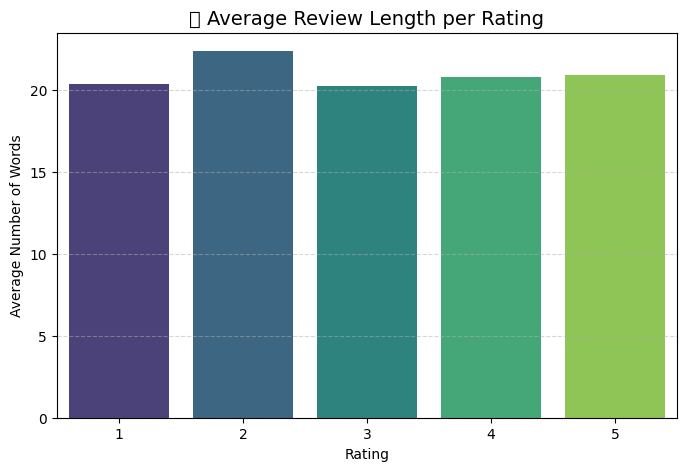

/tmp/ipython-input-3615181946.py:18: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(x='rating', y='review_length', data=df, palette='coolwarm')
/usr/local/lib/python3.12/dist-packages/IPython/core/pylabtools.py:151: UserWarning: Glyph 129521 (\N{BRICK}) missing from font(s) DejaVu Sans.
  fig.canvas.print_figure(bytes_io, **kw)


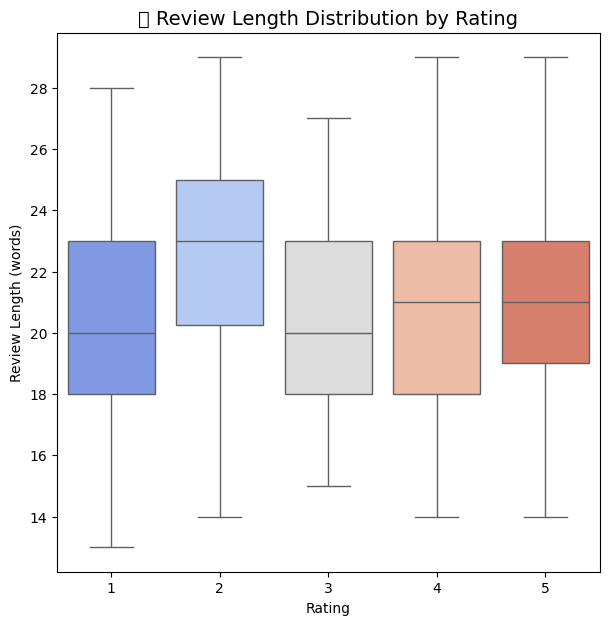

In [ ]:
# Create a column for review length (in words)
df['review_length'] = df['clean_review'].apply(lambda x: len(str(x).split()))

# Compute average review length by rating
avg_length = df.groupby('rating')['review_length'].mean().reset_index()

# --- Option 1: Bar Chart ---
plt.figure(figsize=(8,5))
sns.barplot(x='rating', y='review_length', data=avg_length, palette='viridis')
plt.title('🔠 Average Review Length per Rating', fontsize=14)
plt.xlabel('Rating')
plt.ylabel('Average Number of Words')
plt.grid(axis='y', linestyle='--', alpha=0.5)
plt.show()

# --- Option 2: Box Plot (for distribution view) ---
plt.figure(figsize=(7,7))
sns.boxplot(x='rating', y='review_length', data=df, palette='coolwarm')
plt.title('🧱 Review Length Distribution by Rating', fontsize=14)
plt.xlabel('Rating')
plt.ylabel('Review Length (words)')
plt.show()


#💬 9. What are the most mentioned words in 1-star reviews?
Visualization: Word cloud or bar chart of top terms
 Insight: Spot recurring issues or complaints.#

/usr/local/lib/python3.12/dist-packages/IPython/core/pylabtools.py:151: UserWarning: Glyph 128172 (\N{SPEECH BALLOON}) missing from font(s) DejaVu Sans.
  fig.canvas.print_figure(bytes_io, **kw)


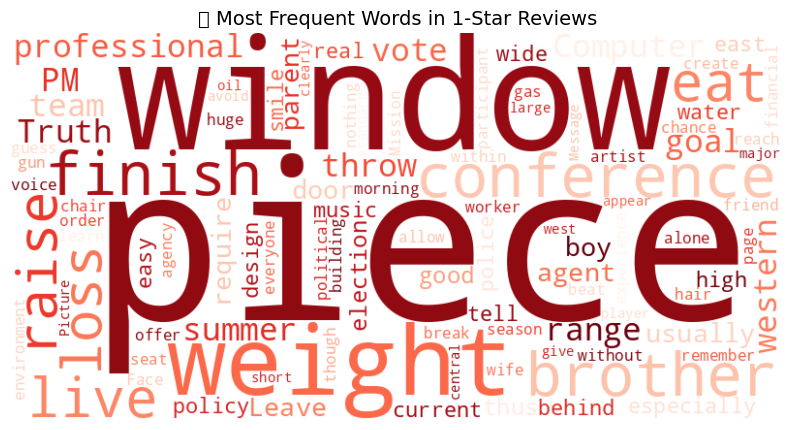

/tmp/ipython-input-3497850494.py:36: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x='count', y='word', data=freq_df, palette='Reds_r')
/usr/local/lib/python3.12/dist-packages/IPython/core/pylabtools.py:151: UserWarning: Glyph 128202 (\N{BAR CHART}) missing from font(s) DejaVu Sans.
  fig.canvas.print_figure(bytes_io, **kw)


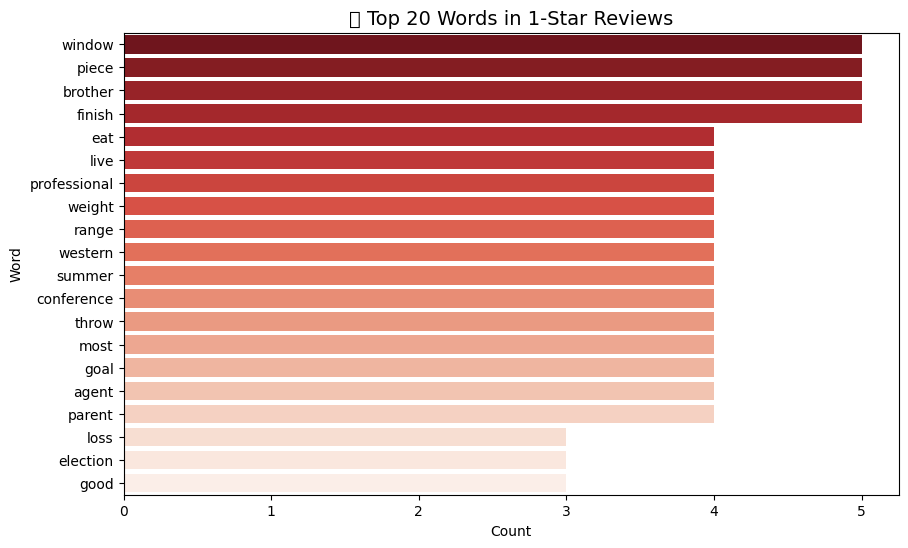

In [ ]:
from wordcloud import WordCloud
from collections import Counter
import matplotlib.pyplot as plt
import seaborn as sns

# Filter only 1-star (or lowest rating) reviews
one_star_reviews = df[df['rating'] == 1]['clean_review']

# Combine all 1-star review text
text_1star = " ".join(one_star_reviews.astype(str))

# --- 🌥️ Option 1: Word Cloud ---
wordcloud = WordCloud(
    width=800, height=400,
    background_color='white',
    colormap='Reds',
    max_words=100
).generate(text_1star)

plt.figure(figsize=(10,6))
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis('off')
plt.title("💬 Most Frequent Words in 1-Star Reviews", fontsize=14)
plt.show()

# --- 📊 Option 2: Bar Chart of Top 20 Words ---
# Split words and count frequency
words = text_1star.split()
word_freq = Counter(words)
common_words = word_freq.most_common(20)

# Convert to DataFrame for plotting
freq_df = pd.DataFrame(common_words, columns=['word', 'count'])

plt.figure(figsize=(10,6))
sns.barplot(x='count', y='word', data=freq_df, palette='Reds_r')
plt.title("📊 Top 20 Words in 1-Star Reviews", fontsize=14)
plt.xlabel("Count")
plt.ylabel("Word")
plt.show()


#📱🧪 10. What ChatGPT version received the highest average rating?
Visualization: Bar chart (version vs. average rating)
 Insight: Evaluate improvement or regression across updates.#

/tmp/ipython-input-3396528210.py:19: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x='rating', y=version_col, data=version_ratings, palette='coolwarm')
/usr/local/lib/python3.12/dist-packages/IPython/core/pylabtools.py:151: UserWarning: Glyph 128241 (\N{MOBILE PHONE}) missing from font(s) DejaVu Sans.
  fig.canvas.print_figure(bytes_io, **kw)
/usr/local/lib/python3.12/dist-packages/IPython/core/pylabtools.py:151: UserWarning: Glyph 129514 (\N{TEST TUBE}) missing from font(s) DejaVu Sans.
  fig.canvas.print_figure(bytes_io, **kw)


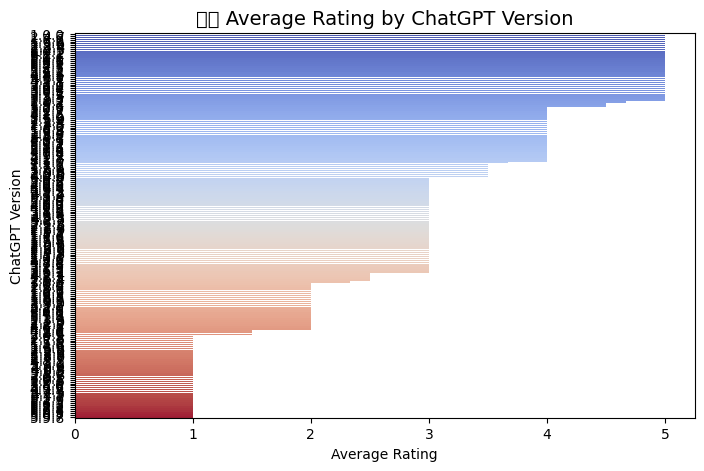

✅ Highest-rated version: 1.0.0 (Avg Rating: 5.00)


In [ ]:

import matplotlib.pyplot as plt
import seaborn as sns

# ✅ Ensure there's a version column (examples: 'app_version', 'chatgpt_version', etc.)
version_col = None
for col in df.columns:
    if 'version' in col.lower():
        version_col = col
        break

if version_col is None:
    print("⚠️ No version column found. Try renaming your version column to 'chatgpt_version' or similar.")
else:
    # Group by version and compute average rating
    version_ratings = df.groupby(version_col)['rating'].mean().reset_index().sort_values(by='rating', ascending=False)

    # 📊 Visualization
    plt.figure(figsize=(8,5))
    sns.barplot(x='rating', y=version_col, data=version_ratings, palette='coolwarm')
    plt.title("📱🧪 Average Rating by ChatGPT Version", fontsize=14)
    plt.xlabel("Average Rating")
    plt.ylabel("ChatGPT Version")
    plt.show()

    # 🧭 Insight
    best_version = version_ratings.iloc[0]
    print(f"✅ Highest-rated version: {best_version[version_col]} (Avg Rating: {best_version['rating']:.2f})")


MODEL TRAINING

In [ ]:
X = df['clean_review']
y = df['rating']  # Use actual sentiment/label column name

sklearn / imblearn

In [ ]:
# sklearn / imblearn
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder
from imblearn.over_sampling import SMOTE
from sklearn.metrics import accuracy_score, f1_score, classification_report, confusion_matrix


classical models


In [ ]:
# classical models
from sklearn.naive_bayes import MultinomialNB
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier

 Keras / TF for LSTM


In [ ]:
import tensorflow as tf
from tensorflow.keras.preprocessing.text import Tokenizer
from tensorflow.keras.preprocessing.sequence import pad_sequences
from tensorflow.keras import layers, models, callbacks
from sklearn.utils.class_weight import compute_class_weight

Hugging Face for Transformer


In [ ]:
from datasets import Dataset, DatasetDict
from transformers import AutoTokenizer, AutoModelForSequenceClassification, TrainingArguments, Trainer

In [ ]:
# ----------------- Prepare data --------------------------------------------------
# small check: df must exist with 'clean_review' and 'sentiment'
assert 'clean_review' in df.columns, "Create df['clean_review'] first"
# If user has ratings instead, convert to sentiments like earlier
if 'sentiment' not in df.columns and 'rating' in df.columns:
    def rating_to_sentiment(r):
        try:
            r = float(r)
        except:
            r = 3.0
        if r >= 4: return 'positive'
        if r == 3: return 'neutral'
        return 'negative'
    df['sentiment'] = df['rating'].apply(rating_to_sentiment)

assert 'sentiment' in df.columns, "Provide df['sentiment'] (labels)"

Encode labels


In [ ]:
# Encode labels
le = LabelEncoder()
y_all = le.fit_transform(df['sentiment'].astype(str))
X_all = df['clean_review'].astype(str)
print("Classes:", le.classes_, "  Samples:", len(X_all))
y_encoded = le.fit_transform(df['sentiment'])


Classes: ['negative' 'neutral' 'positive']   Samples: 250


TF-IDF -> SMOTE -> classical models


In [ ]:


X_train_text, X_test_text, y_train, y_test = train_test_split(
    X_all, y_all, test_size=0.2, random_state=42, stratify=y_all
)

In [ ]:
tfidf = TfidfVectorizer(max_features=20000, ngram_range=(1,2), stop_words='english', min_df=2)
# Fit TF-IDF on train, transform both
X_train_vec = tfidf.fit_transform(X_train_text)
X_test_vec = tfidf.transform(X_test_text)

In [ ]:
from imblearn.over_sampling import SMOTE
# Apply SMOTE on TF-IDF numeric features (works on sparse)
print("Before SMOTE class counts:", np.bincount(y_train))
sm = SMOTE(random_state=42)
X_train_bal, y_train_bal = sm.fit_resample(X_train_vec, y_train)
print("After SMOTE class counts:", np.bincount(y_train_bal))

Before SMOTE class counts: [78 45 77]
After SMOTE class counts: [78 78 78]


In [ ]:

def evaluate_model(name, y_true, y_pred):
    acc = accuracy_score(y_true, y_pred)
    f1w = f1_score(y_true, y_pred, average='weighted')
    print(f"\n{name} -> Accuracy: {acc:.4f}  Weighted F1: {f1w:.4f}")
    print("Classification report:\n", classification_report(y_true, y_pred, target_names=le.classes_))
    print("Confusion matrix:\n", confusion_matrix(y_true, y_pred))
    return acc, f1w

results = {}

# ----- Naive Bayes -----


In [ ]:
mnb = MultinomialNB(alpha=0.5)
mnb.fit(X_train_bal, y_train_bal)
y_pred_mnb = mnb.predict(X_test_vec)
results['MultinomialNB'] = evaluate_model('MultinomialNB', y_test, y_pred_mnb)


MultinomialNB -> Accuracy: 0.3800  Weighted F1: 0.3726
Classification report:
               precision    recall  f1-score   support

    negative       0.50      0.53      0.51        19
     neutral       0.10      0.08      0.09        12
    positive       0.40      0.42      0.41        19

    accuracy                           0.38        50
   macro avg       0.33      0.34      0.34        50
weighted avg       0.37      0.38      0.37        50

Confusion matrix:
 [[10  1  8]
 [ 7  1  4]
 [ 3  8  8]]


In [ ]:
# ----- Logistic Regression -----
lr = LogisticRegression(max_iter=2000, solver='saga', class_weight='balanced')
lr.fit(X_train_bal, y_train_bal)
y_pred_lr = lr.predict(X_test_vec)
results['LogisticRegression'] = evaluate_model('LogisticRegression', y_test, y_pred_lr)


LogisticRegression -> Accuracy: 0.4600  Weighted F1: 0.4312
Classification report:
               precision    recall  f1-score   support

    negative       0.48      0.58      0.52        19
     neutral       0.20      0.08      0.12        12
    positive       0.50      0.58      0.54        19

    accuracy                           0.46        50
   macro avg       0.39      0.41      0.39        50
weighted avg       0.42      0.46      0.43        50

Confusion matrix:
 [[11  0  8]
 [ 8  1  3]
 [ 4  4 11]]


In [ ]:
# ----- Random Forest -----
rf = RandomForestClassifier(n_estimators=300, n_jobs=-1, random_state=42, class_weight='balanced')
rf.fit(X_train_bal, y_train_bal)
y_pred_rf = rf.predict(X_test_vec)
results['RandomForest'] = evaluate_model('RandomForest', y_test, y_pred_rf)


RandomForest -> Accuracy: 0.4400  Weighted F1: 0.3888
Classification report:
               precision    recall  f1-score   support

    negative       0.42      0.53      0.47        19
     neutral       0.00      0.00      0.00        12
    positive       0.50      0.63      0.56        19

    accuracy                           0.44        50
   macro avg       0.31      0.39      0.34        50
weighted avg       0.35      0.44      0.39        50

Confusion matrix:
 [[10  0  9]
 [ 9  0  3]
 [ 5  2 12]]


In [ ]:
from tensorflow.keras.callbacks import EarlyStopping, ReduceLROnPlateau

In [ ]:
import random
from imblearn.over_sampling import RandomOverSampler
from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, classification_report
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Embedding, Bidirectional, LSTM, Dense, Dropout
from tensorflow.keras.preprocessing.text import Tokenizer
from tensorflow.keras.preprocessing.sequence import pad_sequences
from tensorflow.keras.callbacks import EarlyStopping, ReduceLROnPlateau
import tensorflow as tf

# Set seeds for reproducibility
random.seed(42)
np.random.seed(42)
tf.random.set_seed(42)

# Label encode sentiment
le = LabelEncoder()
y_encoded = le.fit_transform(df['sentiment'])

# Tokenization and padding
vocab_size = 5000
max_length = 250
tokenizer = Tokenizer(num_words=vocab_size, oov_token='<OOV>')
tokenizer.fit_on_texts(df['clean_review'])
sequences = tokenizer.texts_to_sequences(df['clean_review'])
X_pad = pad_sequences(sequences, maxlen=max_length, padding='post')

# Train-test split
X_train_pad, X_test_pad, y_train_pad, y_test_pad = train_test_split(
    X_pad, y_encoded, test_size=0.2, random_state=42, stratify=y_encoded)

# Oversample training data to balance classes
ros = RandomOverSampler(random_state=42)
X_resampled, y_resampled = ros.fit_resample(X_train_pad, y_train_pad)

# Build LSTM model
model = Sequential([
    Embedding(input_dim=vocab_size, output_dim=64, input_length=max_length),
    Bidirectional(LSTM(128, dropout=0.3, recurrent_dropout=0.3)),
    Dropout(0.4),
    Dense(len(le.classes_), activation='softmax')
])

model.compile(
    optimizer='adam',
    loss='sparse_categorical_crossentropy',
    metrics=['accuracy']
)

# Define callbacks
early_stop = EarlyStopping(monitor='val_loss', patience=5, restore_best_weights=True)
reduce_lr = ReduceLROnPlateau(monitor='val_loss', factor=0.5, patience=3, min_lr=1e-6)

# Train model with oversampled data and callbacks
history = model.fit(
    X_resampled, y_resampled,
    validation_data=(X_test_pad, y_test_pad),
    epochs=30,
    batch_size=32,
    callbacks=[early_stop, reduce_lr]
)

# Evaluate model on test set
y_pred_probs = model.predict(X_test_pad)
y_pred = np.argmax(y_pred_probs, axis=1)

print("LSTM Accuracy:", accuracy_score(y_test_pad, y_pred))
print(classification_report(y_test_pad, y_pred, target_names=le.classes_))


Epoch 1/30


/usr/local/lib/python3.12/dist-packages/keras/src/layers/core/embedding.py:97: UserWarning: Argument `input_length` is deprecated. Just remove it.
  warnings.warn(


8/8 ━━━━━━━━━━━━━━━━━━━━ 21s 1s/step - accuracy: 0.3451 - loss: 1.1005 - val_accuracy: 0.2400 - val_loss: 1.1034 - learning_rate: 0.0010
Epoch 2/30
8/8 ━━━━━━━━━━━━━━━━━━━━ 10s 1s/step - accuracy: 0.4196 - loss: 1.0923 - val_accuracy: 0.3800 - val_loss: 1.0970 - learning_rate: 0.0010
Epoch 3/30
8/8 ━━━━━━━━━━━━━━━━━━━━ 10s 1s/step - accuracy: 0.4364 - loss: 1.0876 - val_accuracy: 0.3800 - val_loss: 1.0959 - learning_rate: 0.0010
Epoch 4/30
8/8 ━━━━━━━━━━━━━━━━━━━━ 9s 1s/step - accuracy: 0.4141 - loss: 1.0709 - val_accuracy: 0.3800 - val_loss: 1.0989 - learning_rate: 0.0010
Epoch 5/30
8/8 ━━━━━━━━━━━━━━━━━━━━ 15s 1s/step - accuracy: 0.5585 - loss: 1.0399 - val_accuracy: 0.4000 - val_loss: 1.0827 - learning_rate: 0.0010
Epoch 6/30
8/8 ━━━━━━━━━━━━━━━━━━━━ 10s 1s/step - accuracy: 0.7780 - loss: 0.9791 - val_accuracy: 0.4000 - val_loss: 1.0885 - learning_rate: 0.0010
Epoch 7/30
8/8 ━━━━━━━━━━━━━━━━━━━━ 9s 1s/step - accuracy: 0.9135 - loss: 0.8872 - val_accuracy: 0.3600 - val_loss: 1.0933 -

/usr/local/lib/python3.12/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/usr/local/lib/python3.12/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/usr/local/lib/python3.12/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))


In [ ]:
# Download GloVe embeddings (if needed)
!wget http://nlp.stanford.edu/data/glove.6B.zip
!unzip -q glove.6B.zip

--2025-11-12 08:41:03--  http://nlp.stanford.edu/data/glove.6B.zip
Resolving nlp.stanford.edu (nlp.stanford.edu)... 171.64.67.140
Connecting to nlp.stanford.edu (nlp.stanford.edu)|171.64.67.140|:80... connected.
HTTP request sent, awaiting response... 302 Found
Location: https://nlp.stanford.edu/data/glove.6B.zip [following]
--2025-11-12 08:41:03--  https://nlp.stanford.edu/data/glove.6B.zip
Connecting to nlp.stanford.edu (nlp.stanford.edu)|171.64.67.140|:443... connected.
HTTP request sent, awaiting response... 301 Moved Permanently
Location: https://downloads.cs.stanford.edu/nlp/data/glove.6B.zip [following]
--2025-11-12 08:41:03--  https://downloads.cs.stanford.edu/nlp/data/glove.6B.zip
Resolving downloads.cs.stanford.edu (downloads.cs.stanford.edu)... 171.64.64.22
Connecting to downloads.cs.stanford.edu (downloads.cs.stanford.edu)|171.64.64.22|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 862182613 (822M) [application/zip]
Saving to: ‘glove.6B.zip.1’

gl

In [ ]:
import numpy as np
import os

In [ ]:
from sklearn.metrics import classification_report, confusion_matrix
print(classification_report(y_test, y_pred, target_names=le.classes_))
print(confusion_matrix(y_test, y_pred))

In [ ]:
import pickle

# ✅ Save the trained model
model.save("lstm_sentiment_model.h5")

# ✅ Save tokenizer
with open("tokenizer.pkl", "wb") as f:
    pickle.dump(tokenizer, f)

# ✅ Save label encoder
with open("label_encoder.pkl", "wb") as f:
    pickle.dump(le, f)

print("✅ Model, tokenizer, and label encoder saved successfully!")


In [ ]:
from tensorflow.keras.models import load_model
import pickle
import joblib  # add if not already imported

import numpy as np
from tensorflow.keras.preprocessing.sequence import pad_sequences

# ✅ Load the saved model
model = load_model("lstm_sentiment_model.h5")

# ✅ Load tokenizer and label encoder
with open("tokenizer.pkl", "rb") as f:
    tokenizer = pickle.load(f)

with open("label_encoder.pkl", "rb") as f:
    le = pickle.load(f)

tfidf_vectorizer = tfidf
joblib.dump(tfidf_vectorizer, 'tfidf_vectorizer.pkl')



# ✅ Example: Predict new text
def predict_sentiment(text):
    seq = tokenizer.texts_to_sequences([text])
    pad = pad_sequences(seq, maxlen=250, padding='post')
    pred = model.predict(pad)
    label = le.inverse_transform([np.argmax(pred)])
    return label[0]

# 🔍 Try it
print(predict_sentiment("The app is awesome and easy to use!"))


Model Evaluation:

In [ ]:

from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, roc_auc_score, roc_curve, confusion_matrix, classification_report
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np

# ✅ Predictions
y_pred_probs = model.predict(X_test_pad)
y_pred = np.argmax(y_pred_probs, axis=1)

# ✅ Basic metrics
accuracy = accuracy_score(y_test_pad, y_pred)
precision = precision_score(y_test_pad, y_pred, average='weighted', zero_division=0)
recall = recall_score(y_test_pad, y_pred, average='weighted', zero_division=0)
f1 = f1_score(y_test_pad, y_pred, average='weighted', zero_division=0)

print("📊 Model Evaluation Metrics:")
print(f"✅ Accuracy:  {accuracy:.4f}")
print(f"✅ Precision: {precision:.4f}")
print(f"✅ Recall:    {recall:.4f}")
print(f"✅ F1-score:  {f1:.4f}")

# ✅ Classification Report
print("\nDetailed Classification Report:")
print(classification_report(y_test_pad, y_pred, target_names=le.classes_))

# ✅ Confusion Matrix
plt.figure(figsize=(6, 5))
sns.heatmap(confusion_matrix(y_test_pad, y_pred), annot=True, fmt="d", cmap="Blues", xticklabels=le.classes_, yticklabels=le.classes_)
plt.title("Confusion Matrix")
plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.show()


In [ ]:
from sklearn.metrics import roc_curve, auc
from sklearn.preprocessing import label_binarize
import matplotlib.pyplot as plt
import numpy as np

# --- Small prelude to ensure y_test_encoded and label list exist (won't change your core code) ---
if 'y_test_encoded' not in globals():
    try:
        # if you have a fitted label_encoder (e.g. sklearn LabelEncoder), use it
        y_test_encoded = label_encoder.transform(y_test)
    except Exception:
        # if y_test already integer-encoded (0..C-1), use it directly
        y_arr = np.array(y_test)
        if np.issubdtype(y_arr.dtype, np.integer):
            y_test_encoded = y_arr
        else:
            # fallback: fit a temporary LabelEncoder and save it to label_encoder
            from sklearn.preprocessing import LabelEncoder
            label_encoder = LabelEncoder()
            y_test_encoded = label_encoder.fit_transform(y_arr)

# derive classes from the encoded labels (handles 2+ classes automatically)
classes = np.unique(y_test_encoded)
n_classes = len(classes)

# Optional (redundant with to_categorical but works too)
y_test_bin = label_binarize(y_test_encoded, classes=classes)
y_pred_proba = model.predict(X_test_pad)
# --- original code (kept structure) ---
fpr = {}
tpr = {}
roc_auc = {}

# sanity check: y_pred_proba shape should match n_classes
if y_pred_proba.ndim != 2 or y_pred_proba.shape[1] != n_classes:
    raise ValueError(f"y_pred_proba shape {y_pred_proba.shape} does not match number of classes {n_classes}.")

for i in range(n_classes):
    fpr[i], tpr[i], _ = roc_curve(y_test_bin[:, i], y_pred_proba[:, i])
    roc_auc[i] = auc(fpr[i], tpr[i])

# Compute micro-average ROC
fpr["micro"], tpr["micro"], _ = roc_curve(y_test_bin.ravel(), y_pred_proba.ravel())
roc_auc["micro"] = auc(fpr["micro"], tpr["micro"])

plt.figure()
# choose colors with the same length as n_classes (expand if needed)
default_colors = ['blue', 'orange', 'green', 'red', 'purple', 'brown']
colors = default_colors[:n_classes]
labels = label_encoder.classes_ if 'label_encoder' in globals() else [str(c) for c in classes]

for i, color in zip(range(n_classes), colors):
    plt.plot(fpr[i], tpr[i], color=color, lw=2,
             label=f'{labels[i]} (AUC = {roc_auc[i]:.2f})')

plt.plot([0, 1], [0, 1], 'k--', lw=2)
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curves for Sentiment Classes')
plt.legend(loc="lower right")
plt.show()


In [ ]:
  Save the model

In [ ]:
import joblib

# Example variable names — adjust if yours are different
# Replace `vectorizer`, `clf`, `tokenizer`, `model` with your actual objects

# Save TF-IDF + traditional ML model
try:
    joblib.dump(tfidf, "tfidf_vectorizer.pkl")
    joblib.dump(clf, "sentiment_model.pkl")
    print("✅ Saved: tfidf_vectorizer.pkl and sentiment_model.pkl")
except Exception as e:
    print("⚠️ TF-IDF/ML model not found:", e)

# Save tokenizer + DL model
try:
    joblib.dump(tokenizer, "tokenizer.pkl")
    model.save("sentiment_model.keras")  # or .h5 if you used that
    print("✅ Saved: tokenizer.pkl and sentiment_model.keras")
except Exception as e:
    print("⚠️ DL model not found:", e)

from google.colab import files
for f in ["tfidf_vectorizer.pkl", "sentiment_model.pkl", "tokenizer.pkl", "sentiment_model.keras"]:
    if os.path.exists(f):
        files.download(f)


In [ ]:
`!find /content -name "*.pkl" -o -name "*.h5"
